<a href="https://colab.research.google.com/github/JhonRubiano/Programa-para-calculos-del-factor-de-friccion-en-un-tubo/blob/main/programa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #invocamos la librería numérica de Python, que permitira usar constantes como pi
import numpy as np
#importamos la libreria matematica de python para funciones como logaritmo
import math
 
 
'''
Para el número de Reynolds, se tiene por definición que:
 
N_R=(v*D)/V
v: La velocidad del fluido.
V: La iscocidadd del fluido.
D: El diámetro interno de la tubería.
 
donde la velocidad puede expresarse en términos del caudal v = Q/A con 
A=pi*(D/2)^2 entonces, el número de Reynolds es:
 
N_R=(4*Q*D)/(pi*D^2*V)=(4*Q)/(pi*D*V)
 
Por lo tanto, se tendrían como variables:
Q: Caudal.
D: Diámetro interno del tubo.
 
y Como constantes:
 
pi: Número pi, que se invoca con NumPy
V: La viscocidad del fluido, en nuestro caso, aceite o agua.
 
Además de ello, la rugosidad absoluta 'E' es un valor que se ingresa al programa,
que permite calcular la rugosidad relativa:
 
E_r= E/D
 
lo cual agrega que una nueva variable es 
 
E: rugosidad absoluta.
 
'''
 
 
#Definimos una función, que calcula el número de Reynolds
def NumReynolds():
  global N_R # el número de reynolds deifinido para todo el programa
  pi = np.pi #Definimos pi, con NumPy
  N_R = (4*Q*12)/(pi*D*V) #se multiplica por 12, para pasar de pulgadas a pies
  print('El número de Reynolds es:\n',N_R)
 
 
#Definimos una función, que calcula la rugosidad relativa
def rug_relativa():
  global E_r # Rugosidad relativa deifinida para todo el programa
  E_r = E/N_R # es adimensional, como ambas van en mm, no es necesario el factor E-3
   
#Definimos una función para calcular el factor de fricción para regimen turbulento de la ecuación de Colebrook
#por metodo de Newton rapsom
def f(x):
    return x**-0.5+2*math.log10((E/D)/3.7+2.51/(N_R*x**0.5))


#Ahora, definimos la derivada de la función de colebrook
def Df(x):
    return -0.5*x**-1.5+2*(-2.51*x**(-1.5)/(2*N_R))*math.log10(2.7182)/((E/D)/3.7+2.51/(N_R*x*0.5))
 
 
#Definimos una función para que clasifique el flujo a partir del número de Reynolds
def clasificacion():
  global f # Se define para todo el programa
  if N_R < 2000:
    print('El flujo es laminar')
    #entonces el factor de fricción está dado por:
    f = 64/N_R
  elif 2000<= N_R <=4000:
    print('Rango crítico.No es posible clasificar el flujo')
    f = 'No se puede calcular el factor de fricción'
  elif N_R > 4000:
    print('El flujo es turbulento')
    #Empleamos entonces la ecuación de Colebrook
    '''Para método de newton- rapson, usamos un valor semilla'''
    x0=0.0005
    for iteracion in range (1,10):
      x1 = x0-f(x0)/Df(x0) #método de newton rapson
      #print(x1)
      x0=x1
    f=x1
 
 
'''El usuario digita el Caudal, el diámetro interno de la tubería y la 
 rugosidad absoluta de la tubería '''
# Se define el caudal, como float, para que puedan digitarse cantidades con decimales
Q=float(input('Ingrese el valor del caudal (en ft^3/s)\n'))
#Se define el diámetro del tubo como float para poder digitar cantidades decimales
D=float(input('Ingrese el valor del diámetro del tubo (en pulgadas(in))\n'))
# Se define la rugosidad absoluta como float, para tener encuenta los decimales
E=float(input('Ingrese el valor de la rugosidad absoluta (en pulgadas(in))\n'))
V = 0.001 #Pa s viscosidad del agua a 20°C
NumReynolds()
print('')
rug_relativa()
print('')
clasificacion()
print('')
print('El número de Reynolds es:\n',N_R)
print('La rugosidad relativa es:\n',E_r)
print('El factor de fricción es:\n',f)

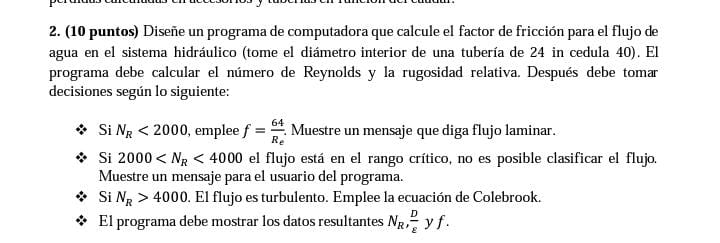


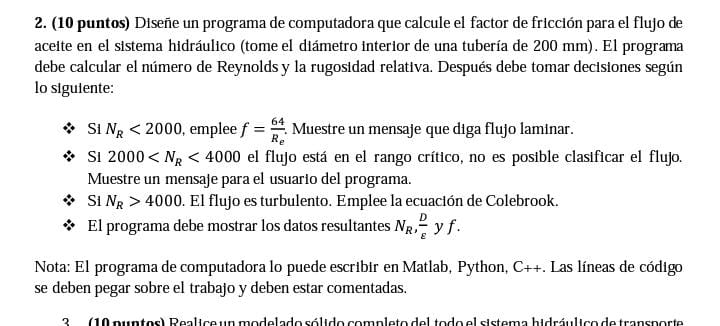


In [ ]:
 
#importamos la librería numérica de Python, que permitira usar constantes como pi
import numpy as np
#importamos la libreria matematica de python para funciones como logaritmo
import math
 
'''Para el número de Reynolds, se tiene por definició que:
 
N_R=(v*D)/V
v: La velocidad del fluido.
V: La iscocidadd del fluido.
D: El diámetro interno de la tubería.
 
donde la velocidad puede expresarse en términos del caudal v = Q/A con 
A=pi*(D/2)^2 entonces, el número de Reynolds es:
 
N_R=(4*Q*D)/(pi*D^2*V)=(4*Q)/(pi*D*V)
 
Por lo tanto, se tendrían como variables:
Q: Caudal.
D: Diámetro interno del tubo.
 
y Como constantes:
 
pi: Número pi, que se invoca con NumPy
V: La viscocidad del fluido, en nuestro caso, aceite o agua.
 
Además de ello, la rugosidad absoluta 'E' es un valor que se ingresa al programa,
que permite calcular la rugosidad relativa:
 
E_r= E/D
 
lo cual agrega que una nueva variable es 
 
E: rugosidad absoluta.
 
'''
 
#Definimos una función, que calcula el número de Reynolds
def NumReynolds():
  global N_R # el número de reynolds deifinido para todo el programa
  pi = np.pi #Definimos pi, con NumPy
  N_R = (4*Q)/(pi*(D*10**(-3))*V)
  print('El número de Reynolds es:\n',N_R)
 
#Definimos una función, que calcula la rugosidad relativa
def rug_relativa():
  global E_r # Rugosidad relativa deifinida para todo el programa
  E_r = E/N_R # es adimensional, como ambas van en mm, no es necesario el factor E-3
 
#Definimos una función para calcular el factor de fricción para regimen turbulento de la ecuación de Colebrook
#por metodo de Newton rapsom
def f(x):
    return x**-0.5+2*math.log10((E/D)/3.7+2.51/(N_R*x**0.5))
 
#Ahora, definimos la derivada de la función de colebrook
def Df(x):
    return -0.5*x**-1.5+2*(-2.51*x**(-1.5)/(2*N_R))*math.log10(2.7182)/((E/D)/3.7+2.51/(N_R*x*0.5))
 
 
#Definimos una función para que clasifique el flujo a partir del número de Reynolds
def clasificacion():
  global f # Se define para todo el programa
  if N_R < 2000:
    print('El flujo es laminar')
    #entonces el factor de fricción está dado por:
    f = 64/N_R
  elif 2000<= N_R <=4000:
    print('Rango crítico.No es posible clasificar el flujo')
    f = 'No se puede calcular el factor de fricción'
  elif N_R > 4000:
    print('El flujo es turbulento')
    #Empleamos entonces la ecuación de Colebrook
    '''Para método de newton- rapson, usamos un valor semilla'''
    x0=0.015
    for iteracion in range (1,11):
      x1 = x0-f(x0)/Df(x0) #método de newton rapson
      x0=x1
    f=x1
 
    
 
    
 
'''El usuario digita el Caudal, el diámetro interno de la tubería y la 
 rugosidad absoluta de la tubería '''
# Se define el caudal, como float, para que puedan digitarse cantidades con decimales
Q=float(input('Ingrese el valor del caudal (en m^3/s)\n'))
#Se define el diámetro del tubo como float para poder digitar cantidades decimales
D=float(input('Ingrese el valor del diámetro del tubo (en mm, esto es E-3)\n'))
# Se define la rugosidad absoluta como float, para tener encuenta los decimales
E=float(input('Ingrese el valor de la rugosidad absoluta (en mm, esto es E-3)\n'))
V = 0.081 # Pa s viscosidad del aceite a 20°C
NumReynolds()
print('')
rug_relativa()
print('')
clasificacion()
print('')
print('El número de Reynolds es:\n',N_R)
print('La rugosidad relativa es:\n',E_r)
print('El factor de fricción es:\n',f)